## Media Company Case Study

> Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [1]:
# Importing all required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#reading dataset in dataframe
media = pd.read_csv("mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


* We can see an unwanted column 'Unnamed:7' , lets drop it

In [3]:
media = media.drop('Unnamed: 7', axis=1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [4]:
#converting Date column in to pandas datetime format

media['Date'] = pd.to_datetime(media['Date'])
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [5]:
# Deriving days since show started
from datetime import date

d0 = date(2017, 2, 28) ## START DATE OF THE SHOW
d1 = media.Date
delta = d1 - pd.to_datetime(d0)
media['day'] = delta

In [6]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [7]:
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype(int)

In [8]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


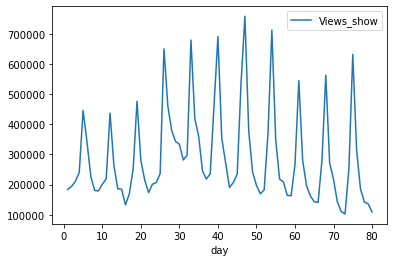

In [9]:
media.plot.line(x='day', y='Views_show')

### From above graph we can see that in every 7 days viewership has spiked

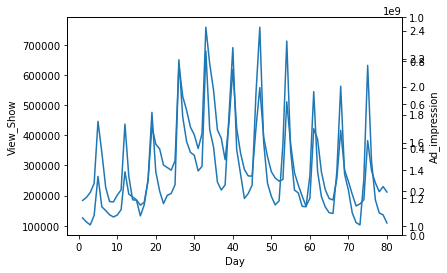

In [10]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

p1, = host.plot(media.day,media.Views_show)
p2, = par1.plot(media.day,media.Ad_impression)

### From above graph we can see that, Ad-Impression also has spiked every 7 days

In [11]:
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable

media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


### Running First Model - Weekday & Visitors

In [12]:
X = media[['Visitors','weekday']]
y = media['Views_show']

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X,y)

LinearRegression()

In [16]:
import statsmodels.api as sm

X = sm.add_constant(X)
lr1 = sm.OLS(y,X).fit()


In [17]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           8.01e-12
Time:                        18:37:34   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.720   -2.52e+05    1.75e+05
Visitors       0.2787      0.057      4.911      0.000       0.166       0.392
weekday    -3.591e+04   6591.205     -5.448      0.000    -4.9e+04   -2.28e+04
==============================================================================
Omnibus:                        2.684   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.653
Skew:                           0.423   Prob(JB):                        0.265
Kurtosis:                       2.718   Cond. No.                     1.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### We can see from above stats that Weekdays has Negative correlation with Views as Coefficient is in '-'
#### Also, both variables are Significant as p-value = 0

In [18]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays

def weekend_cal(i):
    if i%7 == 5: return 1
    elif i%7 == 4: return 1
    else: return 0
    return i

media['weekend'] = [weekend_cal(i) for i in media['day']]

In [19]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


### Running Second Model - Weekend & Visitors

In [20]:
X = media[['Visitors','weekend']]
y = media['Views_show']

In [21]:
X = sm.add_constant(X)
lr2 = sm.OLS(y,X).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           2.51e-12
Time:                        18:37:34   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### We can see from above stats that weekend variable has Positive correlation with Views as Coefficient is in '+', thus in weekends number of views increases
#### Also, both variables are Significant as p-value ~ 0

### Running Third Model with one more variable - Weekend, Visitors and a Character A presence

In [22]:
X = media[['Visitors','weekend','Character_A']]
y = media['Views_show']

In [23]:
X = sm.add_constant(X)
lr3 = sm.OLS(y,X).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           1.53e-14
Time:                        18:37:35   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### So we can see here that - with presence of Character A the model's overall R-squared value has increased. Also, the coefficient of this variable in Positive this mean whenever Character A has appeared it might have increased the views. 

In [24]:
# Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'],1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,108961
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [25]:
## Replacing the first Lag View as its the Views_show of last row.

media.Lag_Views.replace(108961,0,inplace=True)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


### Running Fourth Model with one more variable - Weekend, Visitors, Character A and LagViews

In [26]:
X = media[['Visitors','weekend','Character_A','Lag_Views']]
y = media['Views_show']

In [27]:
X = sm.add_constant(X)
lr4 = sm.OLS(y,X).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           3.16e-21
Time:                        18:37:35   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      0.689   -1.78e+05    1.18e+05
Visitors        0.0659      0.047      1.394      0.167      -0.028       0.160
weekend      2.273e+05    2.4e+04      9.467      0.000    1.79e+05    2.75e+05
Character_A  5.527e+04   2.01e+04      2.748      0.008    1.52e+04    9.53e+04
Lag_Views       0.4317      0.065      6.679      0.000       0.303       0.560
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.821
Skew:                          -0.130   Prob(JB):                        0.663
Kurtosis:                       3.423   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We can see R-squared value of our model increased BUT Significance of 'Visitors' has decreased as p-value > 0.05 now. So, it is like Lag_Views and Visitors are correlated ?

### Lets plot a Correlation Heatmap to visualise the effect of predictor variables on Views_Shows

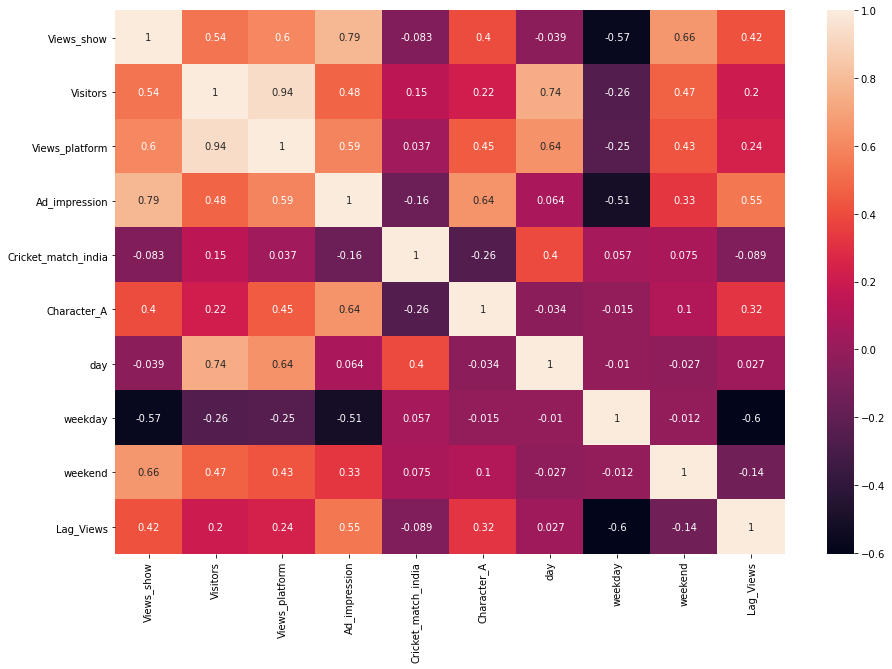

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(media.corr(),annot = True)

#### We can see that Views_Platform has a positivie & high correlation with Views_show, lets use this in our Model now

### Running fifth model Character_A, weekend & Views_platform, dropping Visitors and Lag_Views

In [29]:
X = media[['weekend','Character_A','Views_platform']]
y = media['Views_show']

In [30]:
X = sm.add_constant(X)
lr5 = sm.OLS(y,X).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           3.59e-15
Time:                        18:37:35   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.208      0.231   -3.19e+05    7.81e+04
weekend         1.781e+05   2.78e+04      6.410      0.000    1.23e+05    2.33e+05
Character_A     7.062e+04    2.6e+04      2.717      0.008    1.89e+04    1.22e+05
Views_platform     0.1507      0.048      3.152      0.002       0.055       0.246
==============================================================================
Omnibus:                        4.279   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.153
Skew:                           0.061   Prob(JB):                        0.341
Kurtosis:                       2.206   Cond. No.                     2.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### This is also a pretty Good model and all 3 variables are Significan i.e p-value < 0.05 and R-squared is also good i.e 60%.

### But lets go back and use Visitors and this is a variable which directly gets influenced by Marketing and we have see in earlier model that it was a Significant variable

### Running Sixth model Character_A, weekend & Visitors

In [31]:
X = media[['weekend','Character_A','Visitors']]
y = media['Views_show']

In [32]:
X = sm.add_constant(X)
lr6 = sm.OLS(y,X).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           1.53e-14
Time:                        18:37:35   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Running seventh model Character_A, weekend, Visitors & Ad_impressions

In [33]:
X = media[['weekend','Character_A','Visitors','Ad_impression']]
y = media['Views_show']

In [34]:
X = sm.add_constant(X)
lr7 = sm.OLS(y,X).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           1.10e-25
Time:                        18:37:35   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067      0.000   -4.22e+05   -1.45e+05
weekend        1.485e+05   2.04e+04      7.296      0.000    1.08e+05    1.89e+05
Character_A   -2.934e+04   2.16e+04     -1.356      0.179   -7.24e+04    1.38e+04
Visitors          0.0144      0.042      0.340      0.735      -0.070       0.099
Ad_impression     0.0004   3.96e-05      9.090      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.808   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.007
Skew:                           0.476   Prob(JB):                        0.135
Kurtosis:                       3.545   Cond. No.                     1.32e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### By adding Ad_impression we can see that R-squared has increased to 80% BUT at same time Visitors has become Insignificant as its p-value is 0.735 (very high). So we need to explore the Option of checking Multicollinearity (VIF)

In [35]:
### VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
num_vars = ['Visitors','weekend','Ad_impression','Character_A']
X_temp = media[num_vars]
X_temp.head()

,Visitors,weekend,Ad_impression,Character_A
0,1260228,0,1060860448,0
1,1270561,0,1031846645,0
2,1248183,0,1010867575,0
3,1492913,1,1079194579,0
4,1594712,1,1357736987,0


In [37]:
X_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Visitors       80 non-null     int64
 1   weekend        80 non-null     int64
 2   Ad_impression  80 non-null     int64
 3   Character_A    80 non-null     int64
dtypes: int64(4)
memory usage: 2.6 KB


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
X_temp[num_vars]=scaler.fit_transform(X_temp[num_vars])
X_temp.head()

<ipython-input-39-3cb142873894>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_temp[num_vars]=scaler.fit_transform(X_temp[num_vars])
/Users/ragnarok09/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Visitors,weekend,Ad_impression,Character_A
0,0.010985,0.0,0.035372,0.0
1,0.020409,0.0,0.014844,0.0
2,0.000000,0.0,0.000000,0.0
3,0.223199,1.0,0.048345,0.0
4,0.316041,1.0,0.245426,0.0


In [40]:
vif = pd.DataFrame()
vif['Features'] = X_temp.columns
vif['VIF'] = [variance_inflation_factor(X_temp.values,i) for i in range(X_temp.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,Ad_impression,6.51
0,Visitors,4.35
3,Character_A,2.82
1,weekend,1.76


### Running eight model Character_A, weekend & Ad_impressions

In [41]:
X = media[['weekend','Character_A','Ad_impression']]
y = media['Views_show']

In [42]:
X = sm.add_constant(X)
lr8 = sm.OLS(y,X).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           1.05e-26
Time:                        18:39:14   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
weekend         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Even after removing Visitors we can see that R-squared is still 80% BUT see the Coefficient of Ad_impressions - its 0.0004 whereas coeff of other 2 are high... why?? - Because Ad_impression is in multi-million scale and Views are in millions , so lets scale it.

In [43]:
#Ad impression in million
media['ad_impression_million'] = media['Ad_impression']/1000000

### Running ninth model Adding Cricket Match variable 

In [44]:
X = media[['weekend','Character_A','ad_impression_million','Cricket_match_india']]
y = media['Views_show']

In [45]:
X = sm.add_constant(X)
lr9 = sm.OLS(y,X).fit()
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           1.02e-25
Time:                        20:15:13   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+05    4.8e+04     -5.484      0.000   -3.59e+05   -1.68e+05
weekend                1.521e+05    1.9e+04      7.987      0.000    1.14e+05     1.9e+05
Character_A           -3.196e+04   2.19e+04     -1.457      0.149   -7.57e+04    1.17e+04
ad_impression_million   363.7938     37.113      9.802      0.000     289.861     437.727
Cricket_match_india   -1.396e+04   2.74e+04     -0.510      0.612   -6.85e+04    4.06e+04
==============================================================================
Omnibus:                        5.270   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.560
Skew:                           0.468   Prob(JB):                        0.102
Kurtosis:                       3.701   Cond. No.                     9.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Now we can see that Cricket_match_india has a negative coef. which can infer that - when cricket match is going on the Views declines which make sense BUT see the p-value of Cricket_match_india, its 0.612 , very high, which signifies that this is NOT a Significant variable . So our initial assmption that Cricket_match affects Viewership is NOT TRUE.

### Running Tenth model , dropping Cricket_match_india and Character_A

In [46]:
X = media[['weekend','ad_impression_million']]
y = media['Views_show']

In [47]:
X = sm.add_constant(X)
lr10 = sm.OLS(y,X).fit()
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           1.95e-27
Time:                        20:23:10   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.302e+05   4.01e+04     -5.744      0.000    -3.1e+05    -1.5e+05
weekend                1.551e+05   1.87e+04      8.282      0.000    1.18e+05    1.92e+05
ad_impression_million   330.9993     28.203     11.736      0.000     274.840     387.159
==============================================================================
Omnibus:                        4.941   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.423
Skew:                           0.399   Prob(JB):                        0.110
Kurtosis:                       3.831   Cond. No.                     7.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now this 10th Model - we have R-Squared of ~80% + both predictor variables have p-value ~0
## Also you can see that R-Squared and Adjusted R-Squared is very close by which means that there is no extra variable which we have added in the model creation.

## Lets Assess the model now

In [48]:
# Making predictions.
X = media[['weekend','ad_impression_million']]
X = sm.add_constant(X)

Views_pred = lr10.predict(X)

In [49]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(media.Views_show, Views_pred)
r_squared = r2_score(media.Views_show, Views_pred)

In [50]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4797239258.824437
r_square_value : 0.7975978797926214


Text(0, 0.5, 'Views')

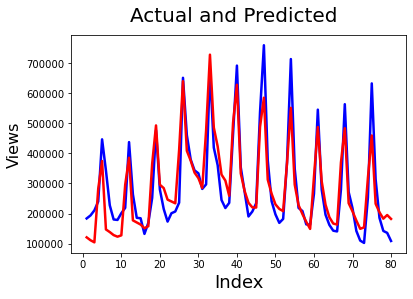

In [51]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Views_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

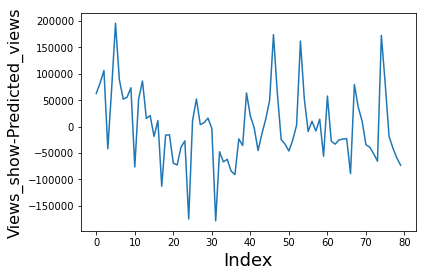

In [53]:
# Residual

res = media.Views_show-Views_pred

plt.plot(res)
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16) 

### Looking at Error pattern - it looks Random, What this essentially confirms is that there are no variables that could have helped explain the model better. 

## Now, we had a model -6 where we used Visitors, Weekend and Character_A to build it. We had a decent R-squared as well ~60% . Also, these 3 variables are significant from Marketing and Business prospective.
## So Lets use this model - 6 as well to see how it predicts.

In [55]:
# Making predictions using the model
X = media[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
Predicted_views = lr6.predict(X)

In [56]:
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 9815432480.451523
r_square_value : 0.585873408097934


Text(0, 0.5, 'Views')

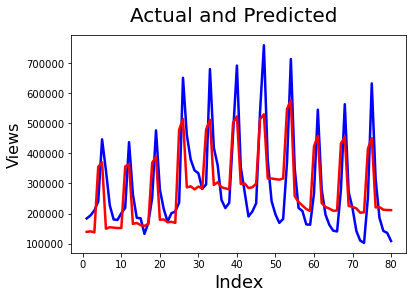

In [57]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

### We can see that this model doesnt predict that well especially the spikes and downs


Text(0, 0.5, 'Views_show-Predicted_views')

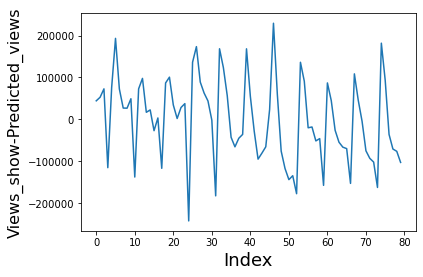

In [58]:
# Residual

res = media.Views_show-Predicted_views

plt.plot(res)
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16) 